# Bitcoin - Regression

Examine bitcoin prices and see if we can predict the value.

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [9]:
%%time
# Resampling data from minute interval to day
bit_df = pd.read_csv('coinbaseUSD_1-min_data_2014-12-01_to_2018-01-08.csv')
bit_df

Wall time: 1.06 s


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000
1,1417412040,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000
2,1417412100,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000
3,1417412160,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000
4,1417412220,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000
...,...,...,...,...,...,...,...,...
1574269,1515369360,16174.21,16174.23,16174.21,16174.23,7.594119,122828.956770,16174.221301
1574270,1515369420,16174.23,16174.23,16174.21,16174.22,11.902468,192513.150940,16174.221081
1574271,1515369480,16174.22,16174.22,16174.21,16174.21,3.860840,62446.073684,16174.218136
1574272,1515369540,16174.22,16174.22,16174.21,16174.22,1.179093,19070.914509,16174.219514


In [10]:
%%time
# Convert unix time to datetime
bit_df['date'] = pd.to_datetime(bit_df.Timestamp, unit='s')
# Reset index
bit_df = bit_df.set_index('date')
# Rename columns so easier to code
bit_df = bit_df.rename(columns={'Open':'open', 'High': 'hi', 'Low': 'lo', 
                       'Close': 'close', 'Volume_(BTC)': 'vol_btc',
                       'Volume_(Currency)': 'vol_cur', 
                       'Weighted_Price': 'wp', 'Timestamp': 'ts'})
# Resample and only use recent samples that aren't missing
bit_df = bit_df.resample('d').agg({'open': 'first', 'hi': 'max', 
    'lo': 'min', 'close': 'last', 'vol_btc': 'sum',
    'vol_cur': 'sum', 'wp': 'mean', 'ts': 'min'}).iloc[-1000:]
# drop last row as it is not complete
bit_df = bit_df.iloc[:-1]

Wall time: 221 ms


In [11]:
bit_df

,open,hi,lo,close,vol_btc,vol_cur,wp,ts
date,,,,,,,,
2015-04-15,221.05,224.52,218.09,224.35,9137.584626,2.029524e+06,222.270771,1.429056e+09
2015-04-16,224.35,230.75,223.66,229.45,8636.837666,1.970069e+06,227.779413,1.429142e+09
2015-04-17,229.45,230.08,220.46,223.62,7738.360003,1.741497e+06,224.970863,1.429229e+09
2015-04-18,223.55,224.04,222.18,224.02,5065.649127,1.131269e+06,223.398170,1.429315e+09
2015-04-19,224.02,226.72,223.44,224.03,5279.787312,1.185860e+06,224.667792,1.429402e+09
...,...,...,...,...,...,...,...,...
2018-01-03,14781.52,15400.00,14628.00,15098.14,17616.327677,2.642264e+08,14989.939350,1.514938e+09
2018-01-04,15098.23,15400.00,14230.00,15144.99,19567.016783,2.909045e+08,14851.477880,1.515024e+09
2018-01-05,15145.00,17178.00,14819.78,16960.01,22588.046307,3.619888e+08,15796.596968,1.515110e+09


## Predict tomorrow's close based on today's info?
We will use a row of data for input. We will call the input X and the prediction y. This is called "supervised learning" as we will feed in both X and y to train the model.

This performs better if we *standardize* the data.

Predict the open price from the ts component.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

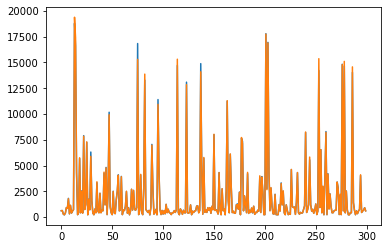

0.9979424623316606

In [35]:
x_col = ['hi',	'lo',	'close',	'vol_btc',	'vol_cur',	'wp',	'ts']
y_col = ['open']

x = bit_df[x_col]
Y = bit_df[y_col]

scaler = StandardScaler().fit(x)
X  = scaler.transform(x)

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state = 5)

m1 = LinearRegression()
m1.fit(x_train,y_train)

# m2 = LogisticRegression()
# m2.fit(x_train,y_train)  #cant use the logistic reegression for continuous variables


pred1 = m1.predict(x_test)
# pred2 = m2.predict(x_test)
# accu = accuracy_score(y_test,pred)

# report = classification_report(y_test.values,pred)
plt.plot(pred1)
# plt.plot(pred2)
plt.plot(y_test.values)
plt.show()
m1.score(x_test,y_test) #,m2.score(x_test,y_test)

> Predicting tmrw close based on today's info

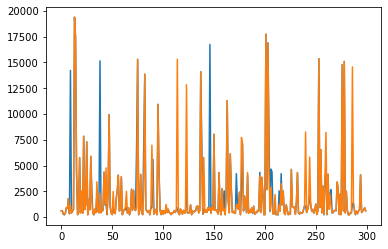

0.9999998317240332

In [41]:
# we'll need to sift the close col up by one
x_col = ['hi',	'lo',	'close',	'vol_btc',	'vol_cur',	'wp',	'ts']
y_col = ['open']

x = bit_df[x_col][:-1]
Y = bit_df[y_col].shift(periods=-1,freq)[:-1]

# x = bit_df[x_col][:-1]
# Y = bit_df[y_col].shift(periods=-1)[:-1]

scaler = StandardScaler().fit(x)
X  = scaler.transform(x)

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state = 5)
X_train,X_test,Y_train,Y_test = train_test_split(bit_df[x_col],bit_df[y_col],test_size=0.3,random_state = 5)

m1 = LinearRegression()
m1.fit(x_train,y_train)




pred1 = m1.predict(x_test)

plt.plot(pred1)
# plt.plot(y_test.values)
plt.plot(Y_test.values)
plt.show()
m1.score(x_test,y_test) 

In [40]:
y_test,Y_test

(              open
 date              
 2016-10-10  618.72
 2016-09-11  607.94
 2015-10-25  284.97
 2015-04-26  221.27
 2016-01-19  375.28
 ...            ...
 2016-05-03  452.21
 2016-08-04  587.50
 2016-10-28  689.95
 2017-01-09  902.66
 2016-09-06  612.99
 
 [300 rows x 1 columns],
               open
 date              
 2016-10-10  617.43
 2016-09-11  623.58
 2015-10-25  284.29
 2015-04-26  227.05
 2016-01-19  384.79
 ...            ...
 2016-05-03  446.53
 2016-08-04  573.35
 2016-10-28  691.01
 2017-01-10  902.66
 2016-09-06  605.93
 
 [300 rows x 1 columns])

<AxesSubplot:xlabel='date'>

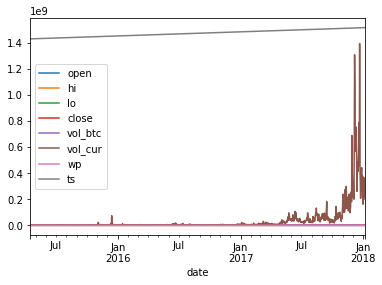

In [ ]:
bit_df.plot()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

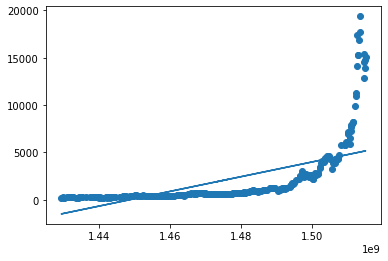

In [40]:
x = bit_df['ts'].values.reshape(-1, 1) 
y = bit_df['open'].values.reshape(-1, 1) 

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 5)

model = LinearRegression()
model.fit(x_train,y_train)

pred = model.predict(x_test)

%matplotlib inline
plt.plot(x_test,pred)
plt.scatter(x_test,y_test,)
plt.legends = True
plt.show()

> Now using more than 2 variables

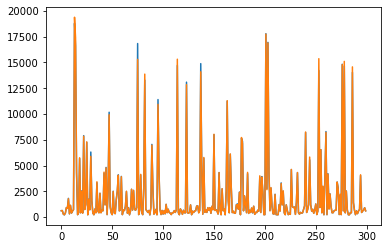

In [135]:
x = bit_df.drop(columns = 'open').values
y = bit_df['open'].values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 5)

model = LinearRegression()
model.fit(x_train,y_train)

pred = model.predict(x_test)

%matplotlib inline
plt.plot(pred)
plt.plot(y_test)
plt.legends = True
plt.show()

In [48]:
bit_df.drop(columns = 'open').values.shape

(999, 7)

In [51]:
bit_df['open'].values.shape

(999,)

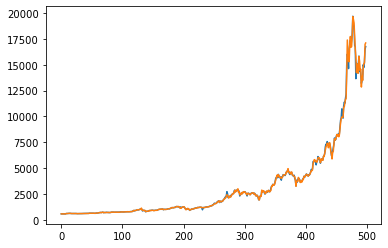

In [134]:
x = bit_df.drop(columns = 'open').values
y = bit_df['open'].values

x_train,x_test,y_train,y_test = x[:500],x[500:],y[:500],y[500:]

model = LinearRegression()
model.fit(x_train,y_train)

pred = model.predict(x_test)

%matplotlib inline
plt.plot(pred)
plt.plot(y_test)
plt.legends = True
plt.show()

In [67]:
x = bit_df.drop(columns = 'open').values
x[0]

array([2.24520000e+02, 2.18090000e+02, 2.24350000e+02, 9.13758463e+03,
       2.02952435e+06, 2.22270771e+02, 1.42905600e+09])

In [70]:
# x[0:50]

In [73]:
future_set = bit_df.shift(periods=30).tail(30)
future_set

,open,hi,lo,close,vol_btc,vol_cur,wp,ts
date,,,,,,,,
2017-12-09,7467.97,7470.01,7079.00,7156.00,17509.919783,1.266867e+08,7247.665142,1.510186e+09
2017-12-10,7156.00,7350.00,6426.00,6577.62,32791.171918,2.230231e+08,6966.398741,1.510272e+09
2017-12-11,6577.63,6894.99,6201.01,6346.70,24975.577100,1.616964e+08,6557.900280,1.510358e+09
2017-12-12,6346.64,6486.00,5511.11,5886.35,49610.285267,2.985255e+08,6097.406380,1.510445e+09
2017-12-13,5886.35,6841.45,5850.00,6535.87,35150.890526,2.245962e+08,6355.194349,1.510531e+09
2017-12-14,6535.87,6748.00,6464.64,6605.00,19505.257774,1.287293e+08,6590.486602,1.510618e+09
2017-12-15,6605.00,7349.00,6605.00,7294.00,27327.128465,1.930247e+08,7051.732138,1.510704e+09
2017-12-16,7294.00,7985.37,7130.00,7838.53,28404.999214,2.149937e+08,7457.429556,1.510790e+09
2017-12-17,7838.54,7988.50,7536.00,7714.71,23950.847741,1.872904e+08,7837.660573,1.510877e+09


In [75]:
bit_df.tail(60)

,open,hi,lo,close,vol_btc,vol_cur,wp,ts
date,,,,,,,,
2017-11-09,7467.97,7470.01,7079.00,7156.00,17509.919783,1.266867e+08,7247.665142,1.510186e+09
2017-11-10,7156.00,7350.00,6426.00,6577.62,32791.171918,2.230231e+08,6966.398741,1.510272e+09
2017-11-11,6577.63,6894.99,6201.01,6346.70,24975.577100,1.616964e+08,6557.900280,1.510358e+09
2017-11-12,6346.64,6486.00,5511.11,5886.35,49610.285267,2.985255e+08,6097.406380,1.510445e+09
2017-11-13,5886.35,6841.45,5850.00,6535.87,35150.890526,2.245962e+08,6355.194349,1.510531e+09
2017-11-14,6535.87,6748.00,6464.64,6605.00,19505.257774,1.287293e+08,6590.486602,1.510618e+09
2017-11-15,6605.00,7349.00,6605.00,7294.00,27327.128465,1.930247e+08,7051.732138,1.510704e+09
2017-11-16,7294.00,7985.37,7130.00,7838.53,28404.999214,2.149937e+08,7457.429556,1.510790e+09
2017-11-17,7838.54,7988.50,7536.00,7714.71,23950.847741,1.872904e+08,7837.660573,1.510877e+09


In [76]:
x_col = ['hi',	'lo',	'close',	'vol_btc',	'vol_cur',	'wp',	'ts']
y_col = ['open']

In [111]:
import matplotlib.pyplot as plt

In [128]:
# %matplotlib
future_set = bit_df.shift(periods=30)
future_set
x = future_set[x_col]
y = future_set[y_col]

x_train,x_test,y_train,y_test = x[30:500],x[500:],y[30:500],y[500:]

model = LinearRegression()
model.fit(x_train,y_train)

pred = model.predict(x_test)

%matplotlib 
plt.legends

plt.plot(bit_df.index[470:-30],pred,color = 'r')
plt.plot(bit_df.index,bit_df[y_col])
plt.fig_size=(15,5)
plt.show()

Using matplotlib backend: Qt5Agg


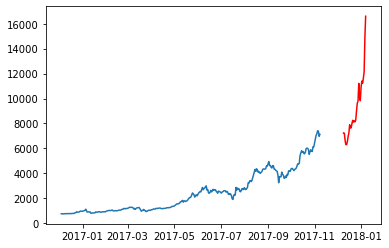

In [142]:
# %matplotlib
future_set = bit_df.shift(periods=30).tail(30)
future_set
x = future_set[x_col]
y = future_set[y_col]

# x_train,x_test,y_train,y_test = x[30:500],x[500:],y[30:500],y[500:]

# model = LinearRegression()
# model.fit(x_train,y_train)

pred = model.predict(x)

%matplotlib inline
plt.legends

plt.plot(future_set.index,pred,color = 'r')
plt.plot(bit_df.index[-400:-60],bit_df[y_col][-400:-60])
plt.fig_size=(15,5)
plt.show()

Text(0, 0.5, '$ Price')

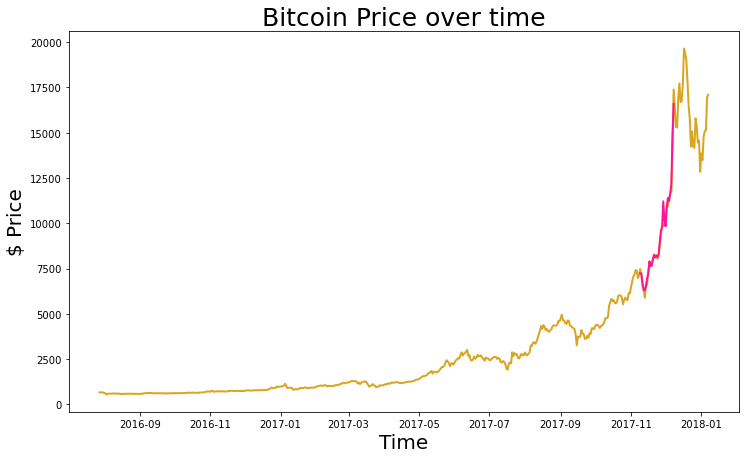

In [150]:
plt.figure(figsize = (12, 7))
plt.plot(bit_df.index[470:], bit_df["open"][470:], color='goldenrod', lw=2)
plt.plot(bit_df.index[-60:-30], pred, color='deeppink', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

In [151]:
pred.shape

(30,)

In [152]:
bit_df

,open,hi,lo,close,vol_btc,vol_cur,wp,ts
date,,,,,,,,
2015-04-15,221.05,224.52,218.09,224.35,9137.584626,2.029524e+06,222.270771,1.429056e+09
2015-04-16,224.35,230.75,223.66,229.45,8636.837666,1.970069e+06,227.779413,1.429142e+09
2015-04-17,229.45,230.08,220.46,223.62,7738.360003,1.741497e+06,224.970863,1.429229e+09
2015-04-18,223.55,224.04,222.18,224.02,5065.649127,1.131269e+06,223.398170,1.429315e+09
2015-04-19,224.02,226.72,223.44,224.03,5279.787312,1.185860e+06,224.667792,1.429402e+09
...,...,...,...,...,...,...,...,...
2018-01-03,14781.52,15400.00,14628.00,15098.14,17616.327677,2.642264e+08,14989.939350,1.514938e+09
2018-01-04,15098.23,15400.00,14230.00,15144.99,19567.016783,2.909045e+08,14851.477880,1.515024e+09
2018-01-05,15145.00,17178.00,14819.78,16960.01,22588.046307,3.619888e+08,15796.596968,1.515110e+09


In [199]:
x_col,y_col
x_col = ['hi', 'lo', 'close', 'vol_btc', 'vol_cur', 'wp']

In [200]:
fut_set = bit_df.copy()
fut_set[x_col] = fut_set[x_col].shift(periods = 30)
fut_set = fut_set[30:]
fut_set.tail()

,open,hi,lo,close,vol_btc,vol_cur,wp,ts
date,,,,,,,,
2018-01-03,14781.52,11650.00,10950.00,11643.98,19535.803182,2.224975e+08,11395.413727,1.514938e+09
2018-01-04,15098.23,11875.00,11532.00,11718.35,17076.406542,2.003207e+08,11722.236141,1.515024e+09
2018-01-05,15145.00,14425.00,11717.50,14090.00,48284.099484,6.245542e+08,12730.867552,1.515110e+09
2018-01-06,16960.01,19697.00,13500.00,17390.01,82099.079272,1.307120e+09,15487.717393,1.515197e+09
2018-01-07,17099.00,17777.69,13788.99,16367.03,63737.738493,1.029258e+09,16144.054311,1.515283e+09


> Gotta make up the index beyond 2018-01-17 for 30days

In [201]:
m1 = LinearRegression()
x = future_set[x_col]
y = future_set[y_col]

x_train,x_test,y_train,y_test = train_test_split(x,y)
m1.fit(x_train,y_train)
# %matplotlib inline
# plt.plot(pred)
# plt.plot(y_test)
# plt.legends = True
# plt.show()
m1.score(x_test,y_test)

0.8686239261832926

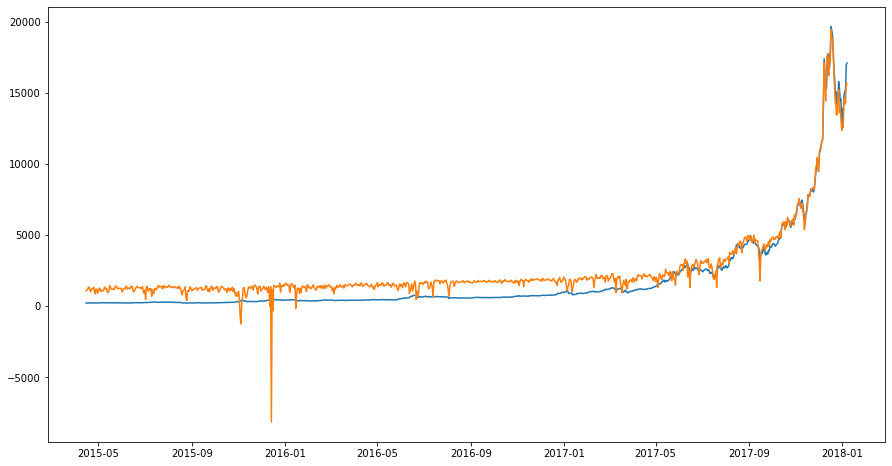

In [203]:
pred = m1.predict(bit_df[x_col])
plt.figure(figsize =  (15,8)) 
plt.plot(bit_df.index,bit_df[y_col])
# plt.plot(pd.date_range(start = '2017-11-08',periods=90),pred)
plt.plot(bit_df.index,pred)

In [194]:
bit_df[x_col].tail(30)

,hi,lo,close,vol_btc,vol_cur,wp,ts
date,,,,,,,
2017-12-09,16499.00,13550.00,15309.98,37269.627741,5.688596e+08,15574.306711,1.512778e+09
2017-12-10,16300.00,13501.00,15290.01,45816.313996,6.799386e+08,14778.087758,1.512864e+09
2017-12-11,17493.00,15200.00,16885.76,36387.254404,6.068353e+08,16692.398515,1.512950e+09
2017-12-12,18149.99,16375.00,17730.12,43928.038180,7.518968e+08,17129.407953,1.513037e+09
2017-12-13,17900.00,15700.00,16689.61,29031.358733,4.936310e+08,17140.075189,1.513123e+09
2017-12-14,17199.60,16256.00,16749.78,15556.181423,2.606386e+08,16791.159970,1.513210e+09
2017-12-15,17899.00,16745.00,17738.67,27651.607481,4.839194e+08,17548.214432,1.513296e+09
2017-12-16,19797.00,17630.00,19650.01,24347.991408,4.569493e+08,18466.783849,1.513382e+09
2017-12-17,19891.99,19010.00,19378.99,21169.979725,4.118753e+08,19537.276941,1.513469e+09
